<h2>Loading Libraries</h2>

In [1]:
!pip install visualkeras
!pip install scikit-plot
import visualkeras
import scikitplot as skplt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 989.9/989.9 kB 8.2 MB/s eta 0:00:00a 0:00:01


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import tensorflow as tf
from  tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

<h2>3>Inceptionv3</h2>


In [15]:
train_gen = ImageDataGenerator(rescale=1./255,  shear_range=0.2,zoom_range=0.2,horizontal_flip=True).flow_from_directory(
                                                    '../input/phytomonk/phytomonk_classification_data/train',
                                                     target_size=(299, 299),
                                                     batch_size=128,
                                                     class_mode='sparse',
                                                     seed=123)
test_gen = ImageDataGenerator(rescale=1./255,  shear_range=0.2,zoom_range=0.2,horizontal_flip=True).flow_from_directory(
                                                    '../input/phytomonk/phytomonk_classification_data/test',
                                                     target_size=(299, 299),
                                                     batch_size=128,
                                                     class_mode='sparse',
                                                     seed=123)

print(train_gen.class_indices)
print(test_gen.class_indices)
from collections import Counter

counter = Counter(train_gen.classes)
print(counter.items()) 

counter = Counter(test_gen.classes)
print(counter.items()) 

Found 12132 images belonging to 4 classes.
Found 2873 images belonging to 4 classes.
{'bacterial spot': 0, 'healthy': 1, 'mildew': 2, 'rust': 3}
{'bacterial spot': 0, 'healthy': 1, 'mildew': 2, 'rust': 3}
dict_items([(0, 4330), (1, 4306), (2, 2326), (3, 1170)])
dict_items([(0, 1091), (1, 1039), (2, 556), (3, 187)])


In [16]:
inception_v3 = tf.keras.applications.inception_v3.InceptionV3(input_shape=(299, 299, 3),
                                               include_top=False,
                                               weights='imagenet')

In [17]:
x = inception_v3.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x) 
x = Dense(64,activation='relu')(x)   
preds = Dense(4,activation='softmax')(x)

model4=Model(inputs=inception_v3.input,outputs=preds)

In [18]:
inception_v3.trainable = False

In [19]:
model4.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [20]:
model4.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model4.fit_generator(
    train_gen, epochs = 13, validation_data = test_gen
)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-11-14 17:48:31.519784: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/13


2022-11-14 17:48:40.632317: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


95/95 [==============================] - 385s 4s/step - loss: 0.2948 - accuracy: 0.8994 - val_loss: 0.1157 - val_accuracy: 0.9652
Epoch 2/13
95/95 [==============================] - 331s 3s/step - loss: 0.0904 - accuracy: 0.9683 - val_loss: 0.0797 - val_accuracy: 0.9729
Epoch 3/13
95/95 [==============================] - 328s 3s/step - loss: 0.0683 - accuracy: 0.9752 - val_loss: 0.0538 - val_accuracy: 0.9802
Epoch 4/13
95/95 [==============================] - 331s 3s/step - loss: 0.0634 - accuracy: 0.9764 - val_loss: 0.0562 - val_accuracy: 0.9791
Epoch 5/13
95/95 [==============================] - 330s 3s/step - loss: 0.0517 - accuracy: 0.9820 - val_loss: 0.0594 - val_accuracy: 0.9784
Epoch 6/13
95/95 [==============================] - 329s 3s/step - loss: 0.0453 - accuracy: 0.9852 - val_loss: 0.0402 - val_accuracy: 0.9857
Epoch 7/13
95/95 [==============================] - 329s 3s/step - loss: 0.0392 - accuracy: 0.9849 - val_loss: 0.0499 - val_accuracy: 0.9829
Epoch 8/13
95/95 [======

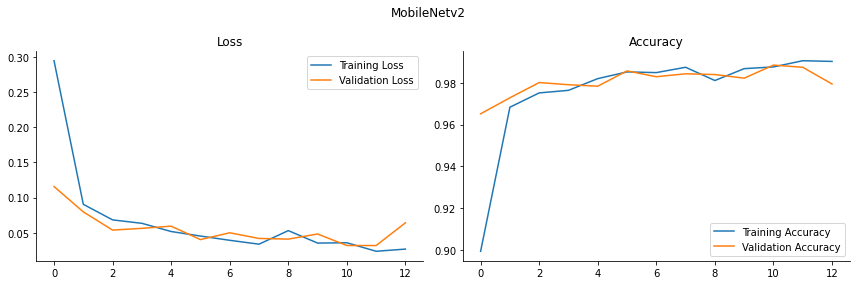

In [22]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.lineplot(x = range(len(history.history["loss"])), 
             y = history.history["loss"], 
             ax = axes[0], label = "Training Loss")

sns.lineplot(x = range(len(history.history["loss"])), 
             y = history.history["val_loss"], 
             ax = axes[0], label = "Validation Loss")

sns.lineplot(x = range(len(history.history["accuracy"])), 
             y = history.history["accuracy"], 
             ax = axes[1], label = "Training Accuracy")

sns.lineplot(x = range(len(history.history["accuracy"])), 
             y = history.history["val_accuracy"], 
             ax = axes[1], label = "Validation Accuracy")

axes[0].set_title("Loss")
axes[1].set_title("Accuracy")
fig.suptitle("MobileNetv2")

plt.tight_layout()

sns.despine()
plt.show()

In [39]:
test_gen_new = ImageDataGenerator(rescale = 1./255).flow_from_directory(
                                                    '../input/phytomonk/phytomonk_classification_data/test',
                                                     target_size=(299, 299),
                                                     batch_size=1,
                                                     class_mode='sparse',
                                                     shuffle = False)

Found 2873 images belonging to 4 classes.


In [40]:
y_pred = model4.predict_generator(test_gen_new)
data = y_pred.copy()
y_pred = np.argmax(y_pred, axis=1)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


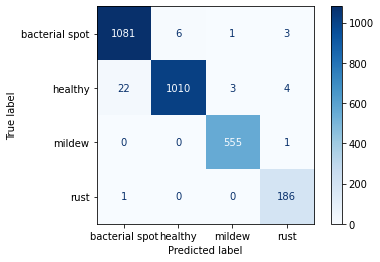

In [42]:
cm = confusion_matrix(test_gen_new.classes, y_pred)
labels = ["bacterial spot","healthy", "mildew", "rust"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [43]:
accuracy_score(test_gen_new.classes, y_pred)

0.9857292029237731

In [44]:
print(classification_report(test_gen_new.classes, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1091
           1       0.99      0.97      0.98      1039
           2       0.99      1.00      1.00       556
           3       0.96      0.99      0.98       187

    accuracy                           0.99      2873
   macro avg       0.98      0.99      0.98      2873
weighted avg       0.99      0.99      0.99      2873



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


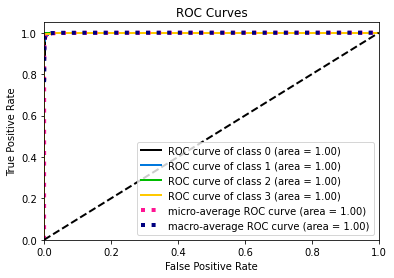

In [45]:
skplt.metrics.plot_roc_curve(test_gen_new.classes, data)
plt.show()

<h2>4>Resnet_V2</h2>


In [53]:
resnet = tf.keras.applications.resnet_v2.ResNet101V2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

In [54]:
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x) 
x = Dense(64,activation='relu')(x)   
preds = Dense(4,activation='softmax')(x)

model5=Model(inputs=resnet.input,outputs=preds)

In [55]:
resnet.trainable = False

In [56]:
model5.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [57]:
model5.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [58]:
train_gen_2 = ImageDataGenerator(rescale=1./255,  shear_range=0.2,zoom_range=0.2,horizontal_flip=True).flow_from_directory(
                                                    '../input/phytomonk/phytomonk_classification_data/train',
                                                     target_size=(224, 224),
                                                     batch_size=128,
                                                     class_mode='sparse',
                                                     seed=123)
test_gen_2 = ImageDataGenerator(rescale=1./255,  shear_range=0.2,zoom_range=0.2,horizontal_flip=True).flow_from_directory(
                                                    '../input/phytomonk/phytomonk_classification_data/test',
                                                     target_size=(224, 224),
                                                     batch_size=128,
                                                     class_mode='sparse',
                                                     seed=123)

print(train_gen.class_indices)
print(test_gen.class_indices)
from collections import Counter

counter = Counter(train_gen.classes)
print(counter.items()) 

counter = Counter(test_gen.classes)
print(counter.items()) 

Found 12132 images belonging to 4 classes.
Found 2873 images belonging to 4 classes.
{'bacterial spot': 0, 'healthy': 1, 'mildew': 2, 'rust': 3}
{'bacterial spot': 0, 'healthy': 1, 'mildew': 2, 'rust': 3}
dict_items([(0, 4330), (1, 4306), (2, 2326), (3, 1170)])
dict_items([(0, 1091), (1, 1039), (2, 556), (3, 187)])


In [59]:
history = model5.fit_generator(
    train_gen_2, epochs = 10, validation_data = test_gen_2
)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
95/95 [==============================] - 227s 2s/step - loss: 0.2192 - accuracy: 0.9246 - val_loss: 0.1028 - val_accuracy: 0.9621
Epoch 2/10
95/95 [==============================] - 214s 2s/step - loss: 0.0574 - accuracy: 0.9801 - val_loss: 0.0482 - val_accuracy: 0.9822
Epoch 3/10
95/95 [==============================] - 215s 2s/step - loss: 0.0421 - accuracy: 0.9849 - val_loss: 0.0493 - val_accuracy: 0.9843
Epoch 4/10
95/95 [==============================] - 211s 2s/step - loss: 0.0321 - accuracy: 0.9894 - val_loss: 0.0342 - val_accuracy: 0.9864
Epoch 5/10
95/95 [==============================] - 214s 2s/step - loss: 0.0242 - accuracy: 0.9918 - val_loss: 0.0493 - val_accuracy: 0.9822
Epoch 6/10
95/95 [==============================] - 214s 2s/step - loss: 0.0236 - accuracy: 0.9918 - val_loss: 0.0411 - val_accuracy: 0.9854
Epoch 7/10
95/95 [==============================] - 215s 2s/step - loss: 0.0183 - accuracy: 0.9932 - val_loss: 0.0354 - val_accuracy: 0.9889
Epoch 8/10
95

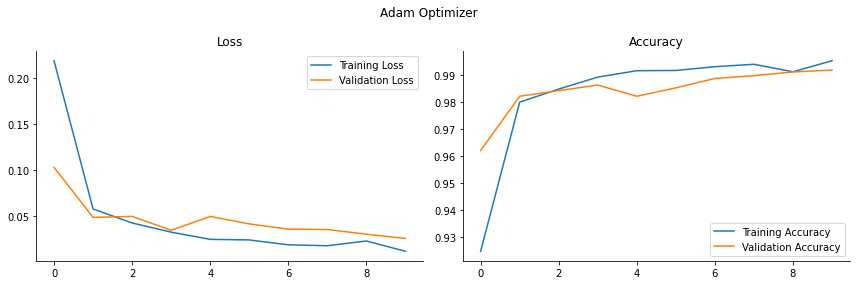

In [60]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.lineplot(x = range(len(history.history["loss"])), 
             y = history.history["loss"], 
             ax = axes[0], label = "Training Loss")

sns.lineplot(x = range(len(history.history["loss"])), 
             y = history.history["val_loss"], 
             ax = axes[0], label = "Validation Loss")

sns.lineplot(x = range(len(history.history["accuracy"])), 
             y = history.history["accuracy"], 
             ax = axes[1], label = "Training Accuracy")

sns.lineplot(x = range(len(history.history["accuracy"])), 
             y = history.history["val_accuracy"], 
             ax = axes[1], label = "Validation Accuracy")

axes[0].set_title("Loss")
axes[1].set_title("Accuracy")
fig.suptitle("Adam Optimizer")

plt.tight_layout()

sns.despine()
plt.show()

In [62]:
test_gen_2_new = ImageDataGenerator(rescale = 1./255).flow_from_directory(
                                                    '../input/phytomonk/phytomonk_classification_data/test',
                                                     target_size=(224, 224),
                                                     batch_size=1,
                                                     class_mode='sparse',
                                                     shuffle = False)

Found 2873 images belonging to 4 classes.


In [63]:
y_pred = model5.predict_generator(test_gen_new)
data = y_pred.copy()
y_pred = np.argmax(y_pred, axis=1)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


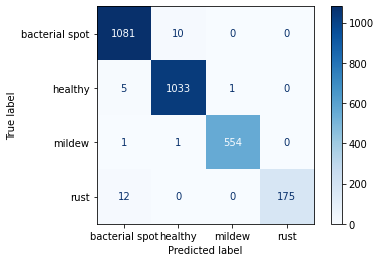

In [64]:
cm = confusion_matrix(test_gen_new.classes, y_pred)
labels = ["bacterial spot","healthy", "mildew", "rust"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [65]:
accuracy_score(test_gen_new.classes, y_pred)

0.9895579533588583

In [66]:
print(classification_report(test_gen_new.classes, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1091
           1       0.99      0.99      0.99      1039
           2       1.00      1.00      1.00       556
           3       1.00      0.94      0.97       187

    accuracy                           0.99      2873
   macro avg       0.99      0.98      0.99      2873
weighted avg       0.99      0.99      0.99      2873



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


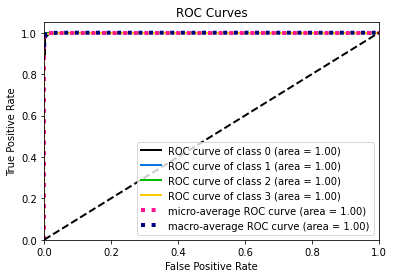

In [67]:
skplt.metrics.plot_roc_curve(test_gen_new.classes, data)
plt.show()

<h2>XceptionNet</h2>

In [69]:
train_gen_3 = ImageDataGenerator(rescale=1./255,  shear_range=0.2,zoom_range=0.2,horizontal_flip=True).flow_from_directory(
                                                    '../input/phytomonk/phytomonk_classification_data/train',
                                                     target_size=(299, 299),
                                                     batch_size=128,
                                                     class_mode='sparse',
                                                     seed=123)
test_gen_3 = ImageDataGenerator(rescale=1./255,  shear_range=0.2,zoom_range=0.2,horizontal_flip=True).flow_from_directory(
                                                    '../input/phytomonk/phytomonk_classification_data/test',
                                                     target_size=(299, 299),
                                                     batch_size=128,
                                                     class_mode='sparse',
                                                     seed=123)

print(train_gen_3.class_indices)
print(test_gen_3.class_indices)
from collections import Counter

counter = Counter(train_gen_3.classes)
print(counter.items()) 

counter = Counter(test_gen_3.classes)
print(counter.items()) 

Found 12132 images belonging to 4 classes.
Found 2873 images belonging to 4 classes.
{'bacterial spot': 0, 'healthy': 1, 'mildew': 2, 'rust': 3}
{'bacterial spot': 0, 'healthy': 1, 'mildew': 2, 'rust': 3}
dict_items([(0, 4330), (1, 4306), (2, 2326), (3, 1170)])
dict_items([(0, 1091), (1, 1039), (2, 556), (3, 187)])


In [70]:
xception = tf.keras.applications.xception.Xception(input_shape=(299, 299, 3),
                                               include_top=False,
                                               weights='imagenet')

83697664/83683744 [==============================] - 0s 0us/step


In [71]:
x = xception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x) 
x = Dense(64,activation='relu')(x)   
preds = Dense(4,activation='softmax')(x)

model6=Model(inputs=xception.input,outputs=preds)

In [72]:
xception.trainable = False

In [73]:
model6.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [74]:
model6.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [75]:
history = model6.fit_generator(
    train_gen_3, epochs = 10, validation_data = test_gen_3
)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
95/95 [==============================] - 366s 4s/step - loss: 0.2568 - accuracy: 0.9113 - val_loss: 0.0842 - val_accuracy: 0.9763
Epoch 2/10
95/95 [==============================] - 354s 4s/step - loss: 0.0673 - accuracy: 0.9791 - val_loss: 0.0562 - val_accuracy: 0.9809
Epoch 3/10
95/95 [==============================] - 352s 4s/step - loss: 0.0462 - accuracy: 0.9860 - val_loss: 0.0540 - val_accuracy: 0.9826
Epoch 4/10
95/95 [==============================] - 353s 4s/step - loss: 0.0399 - accuracy: 0.9861 - val_loss: 0.0308 - val_accuracy: 0.9903
Epoch 5/10
95/95 [==============================] - 353s 4s/step - loss: 0.0321 - accuracy: 0.9880 - val_loss: 0.0376 - val_accuracy: 0.9864
Epoch 6/10
95/95 [==============================] - 354s 4s/step - loss: 0.0298 - accuracy: 0.9889 - val_loss: 0.0506 - val_accuracy: 0.9843
Epoch 7/10
95/95 [==============================] - 354s 4s/step - loss: 0.0286 - accuracy: 0.9896 - val_loss: 0.0296 - val_accuracy: 0.9899
Epoch 8/10
95

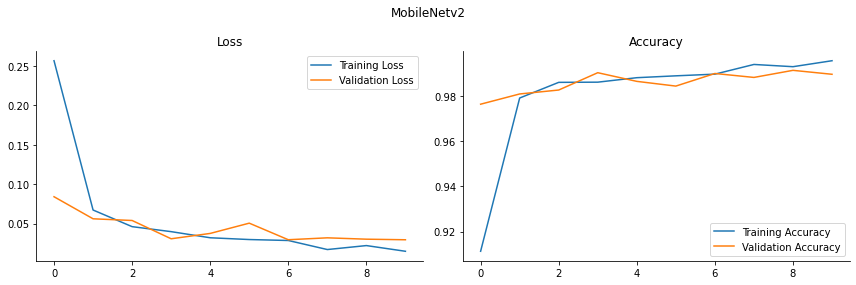

In [76]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.lineplot(x = range(len(history.history["loss"])), 
             y = history.history["loss"], 
             ax = axes[0], label = "Training Loss")

sns.lineplot(x = range(len(history.history["loss"])), 
             y = history.history["val_loss"], 
             ax = axes[0], label = "Validation Loss")

sns.lineplot(x = range(len(history.history["accuracy"])), 
             y = history.history["accuracy"], 
             ax = axes[1], label = "Training Accuracy")

sns.lineplot(x = range(len(history.history["accuracy"])), 
             y = history.history["val_accuracy"], 
             ax = axes[1], label = "Validation Accuracy")

axes[0].set_title("Loss")
axes[1].set_title("Accuracy")
fig.suptitle("MobileNetv2")

plt.tight_layout()

sns.despine()
plt.show()

In [77]:
test_gen_3_new = ImageDataGenerator(rescale = 1./255).flow_from_directory(
                                                    '../input/phytomonk/phytomonk_classification_data/test',
                                                     target_size=(299, 299),
                                                     batch_size=1,
                                                     class_mode='sparse',
                                                     shuffle = False)

Found 2873 images belonging to 4 classes.


In [78]:
y_pred = model6.predict_generator(test_gen_new)
data = y_pred.copy()
y_pred = np.argmax(y_pred, axis=1)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


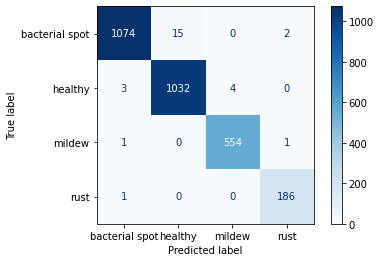

In [79]:
cm = confusion_matrix(test_gen_new.classes, y_pred)
labels = ["bacterial spot","healthy", "mildew", "rust"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [80]:
accuracy_score(test_gen_new.classes, y_pred)

0.9906021580229725

In [81]:
print(classification_report(test_gen_new.classes, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1091
           1       0.99      0.99      0.99      1039
           2       0.99      1.00      0.99       556
           3       0.98      0.99      0.99       187

    accuracy                           0.99      2873
   macro avg       0.99      0.99      0.99      2873
weighted avg       0.99      0.99      0.99      2873



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


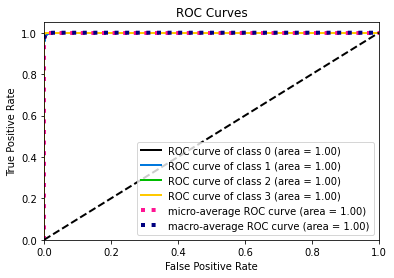

In [82]:
skplt.metrics.plot_roc_curve(test_gen_new.classes, data)
plt.show()